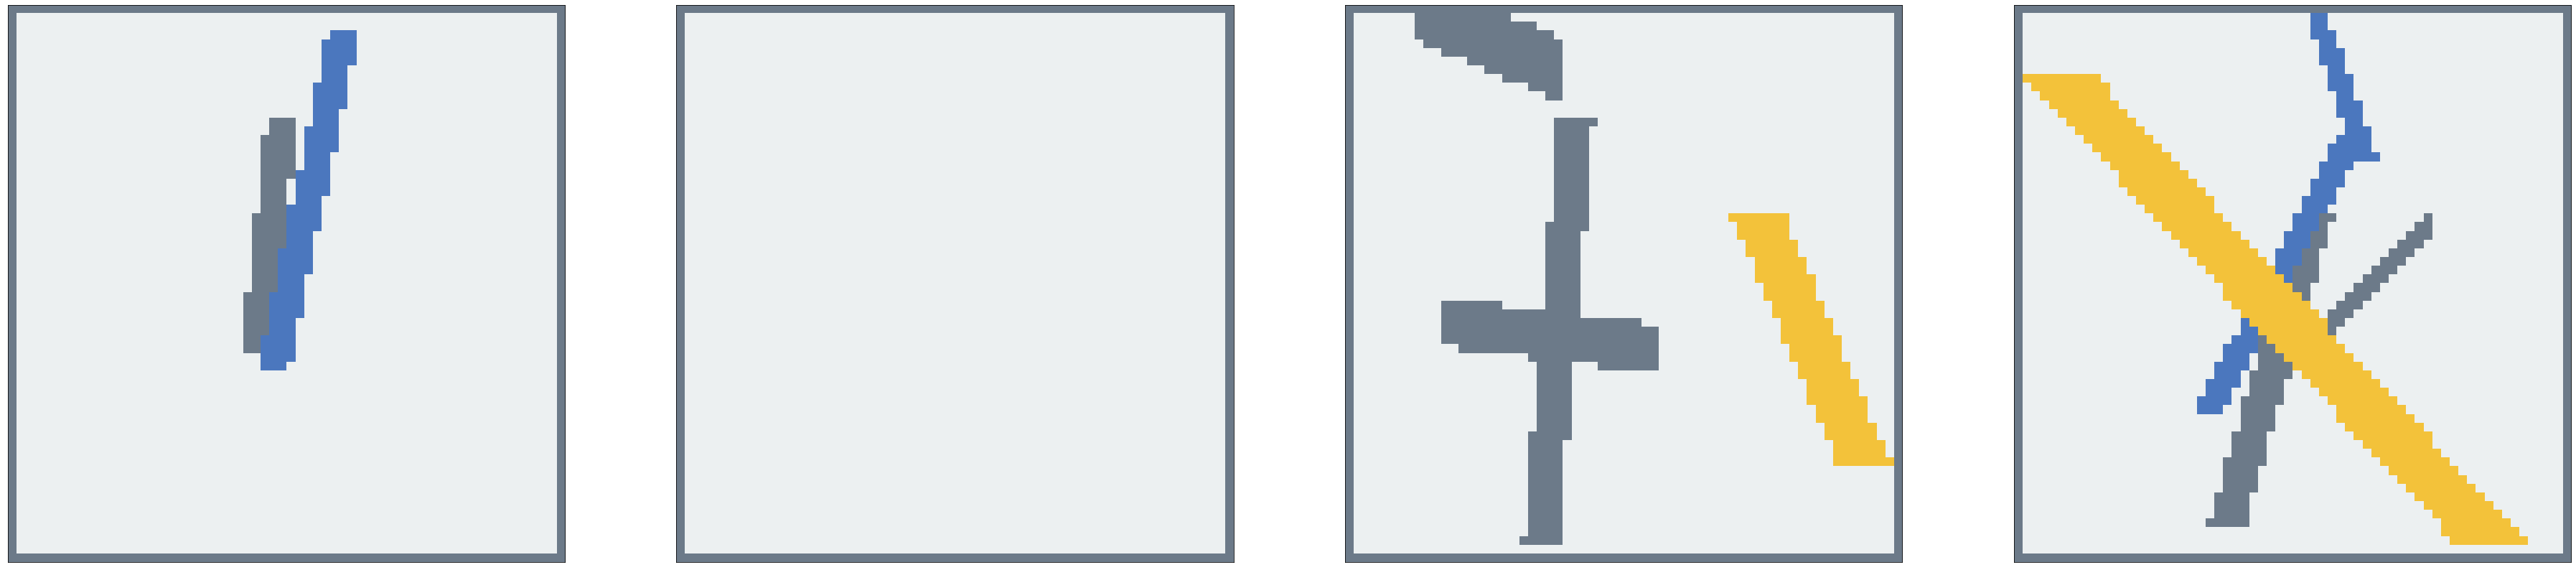

In [2]:
# VISUALIZE WORLD GEN

from powderworld import PWSim, PWRenderer
import powderworld.dists
import torch
import numpy as np
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

device = 'cuda'
pw = PWSim(device, use_jit=False)
pwr = PWRenderer(device)

def show_row(world, name='dist', size=4):
    imgs = [pwr.render(world[x:x+1]) for x in range(size)]
    fig = plt.figure(figsize=(16*size,16))
    axarr = fig.subplots(1, size)
    for b in range(size):
        axarr[b].imshow(imgs[b])
        axarr[b].get_xaxis().set_visible(False)
        axarr[b].get_yaxis().set_visible(False)
    del imgs
    fig.show()
    plt.show()
    del fig
    
world = torch.zeros((4, pw.NUM_CHANNEL, 64, 64), dtype=torch.float32, device=device)
for b in range(4):
    powderworld.dists.make_world(pw, world[b:b+1], num_lines=5, num_circles=0, num_squares=0)
show_row(world)

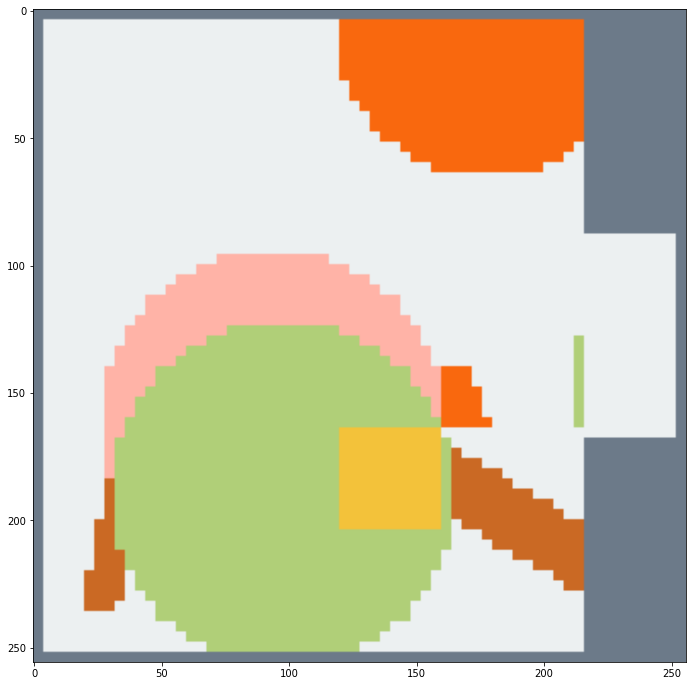

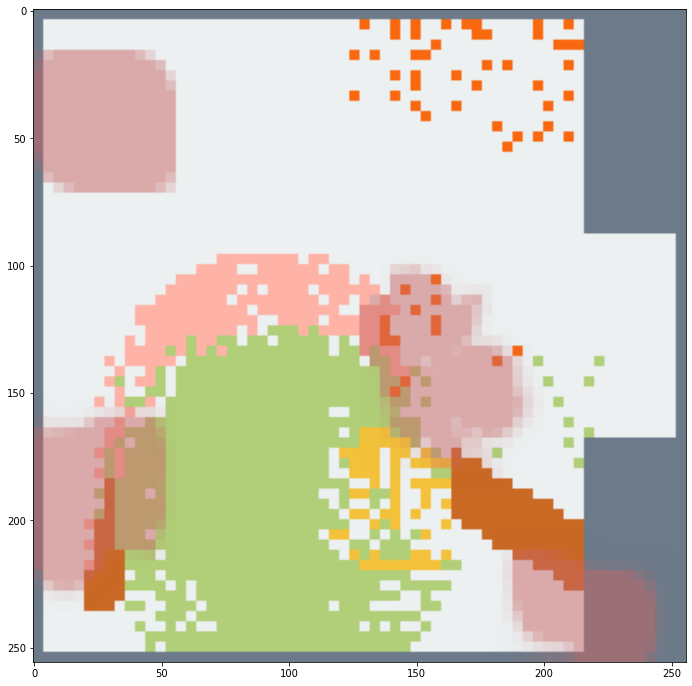

In [12]:
# VISUALIZE RL TASK

from powderworld.envs import PWSandEnv
def show_row(env):
    imgs = env.render()
    fig = plt.figure(figsize=(4*4,4*3))
    axarr = fig.subplots(1, 1)
    axarr.imshow(imgs)
    plt.imshow(imgs)
    del imgs
    plt.show()
    
all_elems = ['empty', 'sand', 'water', 'wall', 'plant', 'fire', 'wood', 'ice', 'lava', 'dust', 'cloner', 'gas', 'acid', 'stone']
kwargs_pcg = dict(hw=(64,64), elems=all_elems, num_tasks=100000, num_lines=5, num_circles=5, num_squares=0)
env = PWSandEnv(test=False, kwargs_pcg=kwargs_pcg, device='cuda', use_jit=False)
env.reset()
show_row(env)
for t in range(4):
    env.step(env.action_space.sample())
show_row(env)